# **Introduction**

As a budding data analyst working towards a career in data science, one of the more prevalent discussions I noticed were that entry level data analyst positions were often paid incredibly well. While I began working in this field to eventually integrate it with my Biochemistry background, I wasn't sure if these salaries were something I should get excited about or merely a pipedream created by people on the internet. When I saw this dataset I figured it would be an excellent opportunity to explore what the salaries of different data science professionals looked like in my experience bracket as well as what to expect (or strive towards) in the future of my career.

# **Questions**

* What entry level data jobs pay the highest? The lowest?
* Are on-site jobs better paid than remote jobs? Hybrid?
* What type of position is more prevalent in the field?
* How do these jobs increase in pay as experience level increases?

# Data Exploration and Cleaning

In [1]:
## numpy and pandas for data wrangling

import numpy as np
import pandas as pd

## matplotlib and seaborn for data viz
import matplotlib.pyplot as plt
import seaborn as sns

## padasql for SQL queries with pandas
import pandasql as pysql

## pycountry to deal with ISO 3166 codes in the data
import pycountry

In [2]:
## Importing Data Set
salaries = pd.read_csv("../input/data-science-job-salaries/ds_salaries.csv", index_col=0)

## Confirming df imported, taking note of its column names and shape
print(salaries.head(), salaries.columns, salaries.shape, sep = '\n----------------------------\n')

## Data consists of 607 rows and 11 columns.

   work_year experience_level employment_type                   job_title  \
0       2020               MI              FT              Data Scientist   
1       2020               SE              FT  Machine Learning Scientist   
2       2020               SE              FT           Big Data Engineer   
3       2020               MI              FT        Product Data Analyst   
4       2020               SE              FT   Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   70000             EUR          79833                 DE             0   
1  260000             USD         260000                 JP             0   
2   85000             GBP         109024                 GB            50   
3   20000             USD          20000                 HN             0   
4  150000             USD         150000                 US            50   

  company_location company_size  
0               DE            L  
1     

In [3]:
## Are there any null values?
salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
## Unique values?

salaries.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [5]:
## Replacing values for remote_ratio and experience_level to improve legibility

salaries.remote_ratio.replace([100,50,0], ["Remote", "Hybrid" ,"On-Site"], inplace=True)
salaries.experience_level.replace(["EN", "MI", "SE", "EX"], ["Entry", "Mid", "Senior", "Executive"], inplace=True)

In [6]:
## Filtering the df to display columns of interest
salaries_jobs = salaries[["job_title", "experience_level", "employment_type", "salary_in_usd", "employee_residence","company_location", "remote_ratio"]]

salaries_jobs

,job_title,experience_level,employment_type,salary_in_usd,employee_residence,company_location,remote_ratio
0,Data Scientist,Mid,FT,79833,DE,DE,On-Site
1,Machine Learning Scientist,Senior,FT,260000,JP,JP,On-Site
2,Big Data Engineer,Senior,FT,109024,GB,GB,Hybrid
3,Product Data Analyst,Mid,FT,20000,HN,HN,On-Site
4,Machine Learning Engineer,Senior,FT,150000,US,US,Hybrid
...,...,...,...,...,...,...,...
602,Data Engineer,Senior,FT,154000,US,US,Remote
603,Data Engineer,Senior,FT,126000,US,US,Remote
604,Data Analyst,Senior,FT,129000,US,US,On-Site
605,Data Analyst,Senior,FT,150000,US,US,Remote


In [7]:
## We are going to need to adjust the table to show the full names of the countries for better readability

country_list = []
for country_code in salaries_jobs.company_location:
    country_list.append(pycountry.countries.get(alpha_2=country_code).name)

salaries_jobs['company_location'] = country_list

salaries_jobs.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,job_title,experience_level,employment_type,salary_in_usd,employee_residence,company_location,remote_ratio
0,Data Scientist,Mid,FT,79833,DE,Germany,On-Site
1,Machine Learning Scientist,Senior,FT,260000,JP,Japan,On-Site
2,Big Data Engineer,Senior,FT,109024,GB,United Kingdom,Hybrid
3,Product Data Analyst,Mid,FT,20000,HN,Honduras,On-Site
4,Machine Learning Engineer,Senior,FT,150000,US,United States,Hybrid


In [8]:
## Counting number of entries per remote_ratio classification

salaries_jobs.groupby(["remote_ratio"])["remote_ratio"].count()

remote_ratio
Hybrid      99
On-Site    127
Remote     381
Name: remote_ratio, dtype: int64

In [9]:
## Filtering data for Full time (FT) US companies

salaries_US = salaries_jobs[(salaries_jobs["company_location"]=="United States") & (salaries_jobs["employment_type"]=="FT")]

salaries_US

,job_title,experience_level,employment_type,salary_in_usd,employee_residence,company_location,remote_ratio
4,Machine Learning Engineer,Senior,FT,150000,US,United States,Hybrid
5,Data Analyst,Entry,FT,72000,US,United States,Remote
6,Lead Data Scientist,Senior,FT,190000,US,United States,Remote
8,Business Data Analyst,Mid,FT,135000,US,United States,Remote
13,Lead Data Analyst,Mid,FT,87000,US,United States,Remote
...,...,...,...,...,...,...,...
602,Data Engineer,Senior,FT,154000,US,United States,Remote
603,Data Engineer,Senior,FT,126000,US,United States,Remote
604,Data Analyst,Senior,FT,129000,US,United States,On-Site
605,Data Analyst,Senior,FT,150000,US,United States,Remote


In [10]:
## Once more counting number of entries per remote_ratio classification for the US

salaries_US.groupby(["remote_ratio"])["remote_ratio"].count()

remote_ratio
Hybrid      20
On-Site     68
Remote     258
Name: remote_ratio, dtype: int64

The data frame contains 607 entries of varying data science salaries in the world and 346 entries located within the United States.

While 607 entries is far from being enough data to have an all conclusive answer to any of my questions but it will certainly help generate an idea of what Data Science salaries are like.

# What entry level data jobs pay the highest? The lowest?


In [11]:
## Filtering experience level for EN for Entry-level and sorting salary from high to low:

salaries_EN = salaries_US[(salaries_US["experience_level"]=="Entry")].sort_values("salary_in_usd", ascending=False)

salaries_EN.head()

,job_title,experience_level,employment_type,salary_in_usd,employee_residence,company_location,remote_ratio
37,Machine Learning Engineer,Entry,FT,250000,US,United States,Hybrid
115,Machine Learning Scientist,Entry,FT,225000,US,United States,Remote
39,Machine Learning Engineer,Entry,FT,138000,US,United States,Remote
159,Machine Learning Engineer,Entry,FT,125000,US,United States,Remote
454,Computer Vision Engineer,Entry,FT,125000,US,United States,On-Site


In [12]:
salaries_EN.shape

(28, 7)

I could just take a look at the complete table and see that a Machine Learning (ML) Engineer and a Data Analyst are the most and least paid EL positions respectively on the dataframe, but I recently learned how to use SQL with Python so humor me for 2 quick lines of code :)

In [13]:
# Quick SQL query to pull the complete row for most paid entry level position
salaries_EN_max = pysql.sqldf("SELECT job_title, experience_level, employment_type, MAX(salary_in_usd) AS 'salary_in_usd', company_location, remote_ratio FROM salaries_EN;")

salaries_EN_max

,job_title,experience_level,employment_type,salary_in_usd,company_location,remote_ratio
0,Machine Learning Engineer,Entry,FT,250000,United States,Hybrid


In [14]:
# And another query to pull the lowest paid entry level full time position
salaries_EN_min = pysql.sqldf("SELECT job_title, experience_level, employment_type, MIN(salary_in_usd) AS 'salary_in_usd', company_location, remote_ratio FROM salaries_EN WHERE employment_type = 'FT';")

salaries_EN_min

,job_title,experience_level,employment_type,salary_in_usd,company_location,remote_ratio
0,Data Analyst,Entry,FT,50000,United States,Remote


Oh cool! So happy I found a solution that works with SQL.

So it looks like from 607 rows, 31 entries relate to entry level positions in the US. 

* The highest paying position comes from an FT Machine Learning Engineer with a yearly salary of \\$250,000.00.

* The lowest paying position comes from an FT Data Analyst with a yearly salary of \\$50,000.00.

However, the data has multiple entries with same position with varying salaries so let's take a look at what the average salary of each position is like from this dataframe before making any conclusions.

In [15]:
salaries_US_mean = round(salaries_EN.groupby(salaries_EN["job_title"]).mean().sort_values("salary_in_usd", ascending=False), 2)

salaries_US_mean

,salary_in_usd
job_title,
Machine Learning Scientist,225000.00
Machine Learning Engineer,148500.00
Computer Vision Engineer,125000.00
Research Scientist,120000.00
Financial Data Analyst,100000.00
Data Science Consultant,90000.00
Data Scientist,88833.33
Data Engineer,84375.00
Data Analyst,73833.33


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


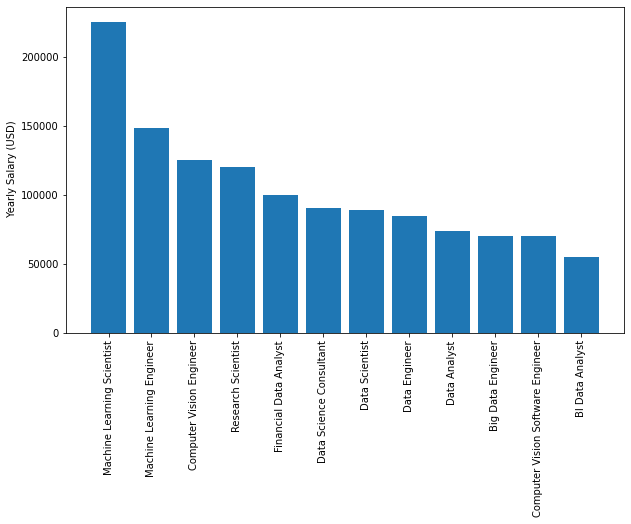

In [16]:
#This time lets draw up a bar graph to have a visual comparison of the average salaries for each position

fig, ax = plt.subplots()
fig.set_size_inches([10, 6])

ax.bar(salaries_US_mean.index, salaries_US_mean["salary_in_usd"])
ax.set_ylabel(" Yearly Salary (USD)")
ax.set_xticklabels(salaries_US_mean.index, rotation=90)

plt.show()

The bar graph makes it pretty evident what position has the largest average salary from the data frame. Looks like ML Scientists have the largest entry level salaries, while BI Data Analysts average the lowest. 

Seems like the ML Engineer position I singled out earlier is more of an outlier as the average ML Engineer position earns \\$148,000.00, a whopping \\$102,000.00 more than the average.

Meanwhile Data Analysts can rejoice as they are not the lowest paid positions in Data Science on average (Yay me! That's my desired starting position). The lowest paid position on average is the BI Data Analyst with about \\$15,000.00 less than the next lowest position.

# Are on-site jobs better paid than remote jobs?

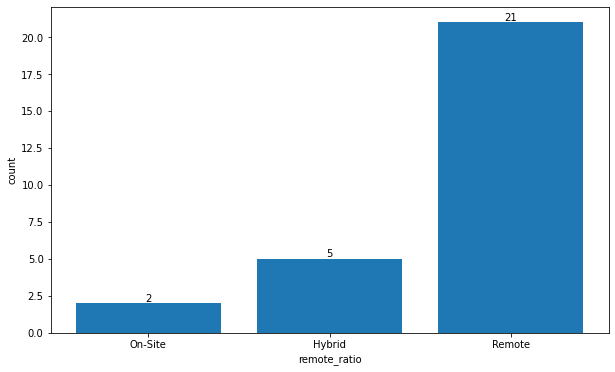

In [17]:
## Count of Entry Level US remote jobs

EN_remote_count = salaries_EN.groupby(["remote_ratio"])["remote_ratio"].count().sort_values()

## Bar graph visualizing number of jobs per remote_ratio in Entry Level US positions

fig, ax = plt.subplots()
fig.set_size_inches([10, 6])

bar1 = ax.bar(EN_remote_count.index, EN_remote_count)

ax.set_xlabel("remote_ratio")
ax.set_ylabel("count")
ax.bar_label(bar1)

plt.show()

In [18]:
## Average salary for each remote_ratio in Entry Level US positions

round(salaries_EN.groupby(salaries_EN["remote_ratio"]).mean().sort_values("salary_in_usd", ascending=False), 2)

,salary_in_usd
remote_ratio,
On-Site,112500.00
Hybrid,108800.00
Remote,94928.57


The number of On-Site and Hybrid positions is a bit far too low to effectively compare it with the amount of Remote positions in the US so I'm going to increase the scope of this search to include other countries. 

In [19]:
## Lets take a look at the salary data for all available company locations

exp_entry = salaries_jobs["experience_level"]=="Entry"
ft_jobs = salaries_jobs["employment_type"]=="FT"

salaries_global_EN = salaries_jobs[exp_entry & ft_jobs]

salaries_global_EN.head()

,job_title,experience_level,employment_type,salary_in_usd,employee_residence,company_location,remote_ratio
5,Data Analyst,Entry,FT,72000,US,United States,Remote
10,Data Scientist,Entry,FT,51321,FR,France,On-Site
12,Data Scientist,Entry,FT,39916,FR,France,On-Site
16,Data Engineer,Entry,FT,41689,JP,Japan,Remote
18,Data Science Consultant,Entry,FT,5707,IN,India,Hybrid


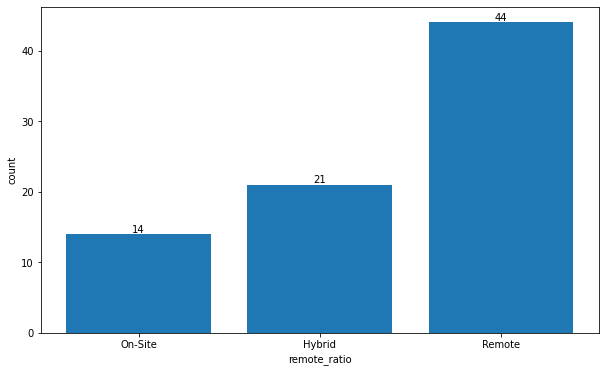

In [20]:
## Count of Entry Level remote jobs

global_remote_count = salaries_global_EN.groupby(["remote_ratio"])["remote_ratio"].count().sort_values()

## Bar graph visualizing number of jobs per remote_ratio in Entry Level US positions

fig, ax = plt.subplots()
fig.set_size_inches([10, 6])

bar2 = ax.bar(global_remote_count.index, global_remote_count)

ax.set_xlabel("remote_ratio")
ax.set_ylabel("count")
ax.bar_label(bar2)

plt.show()

Looks like Remote global positions are still far more prevalent globaly than On-Site or Hybrid but compared to US positions the ratio of Remote to On-Site is about 3x while in the US its 11x as many so I'm going to proceed comparing the global remote positions for this question.

In [21]:
## Average salary for each remote_ratio in Entry Level global position

mean_global_EN = round(salaries_global_EN.groupby(salaries_global_EN["remote_ratio"]).mean().sort_values("salary_in_usd", ascending=False), 2)

## Now out of curiousity lets compare that with the US average
mean_global_EN["us_mean_salary"] = round(salaries_EN.groupby(salaries_EN["remote_ratio"]).mean().sort_values("salary_in_usd", ascending=False), 2)

## Difference between mean global salaries and mean US salaries for Entry Level positions
mean_global_EN["difference"] = mean_global_EN["salary_in_usd"]-mean_global_EN["us_mean_salary"]

difference = mean_global_EN.sort_values("salary_in_usd", ascending=False)

difference

,salary_in_usd,us_mean_salary,difference
remote_ratio,,,
Remote,66885.45,94928.57,-28043.12
Hybrid,63897.62,108800.00,-44902.38
On-Site,57666.36,112500.00,-54833.64


If we compared mean salaries globally and the US, it looks like the US has a larger income across the board but due to the low number of On-Site and Hybrid positions compared to the global numbers, this isn't a good conclusion.

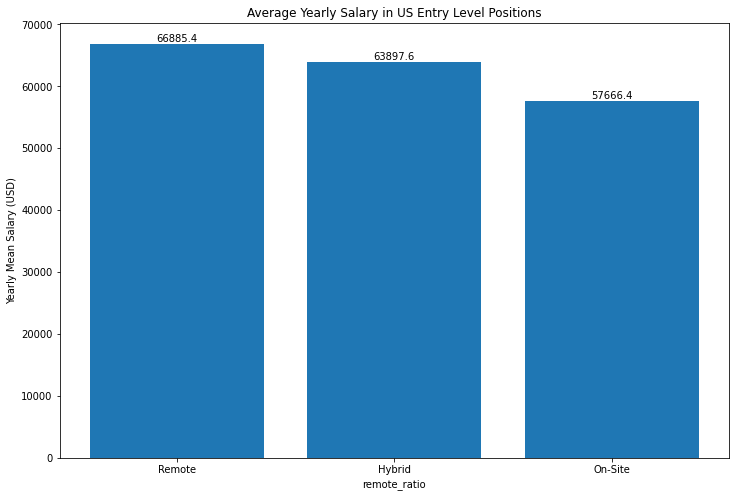

In [22]:
## Visual comparison of Entry Level Global Salaries on average between remote ratios

fig, ax = plt.subplots()
fig.set_size_inches([12, 8])

bar3 = ax.bar(difference.index, difference["salary_in_usd"])

ax.set_ylabel("Yearly Mean Salary (USD)")
ax.set_xlabel("remote_ratio")
ax.set_title("Average Yearly Salary in US Entry Level Positions")
ax.bar_label(bar3)


plt.show()

Looks like remote makes a bit more on average than Hybrid or On-Site positions. I'm curious to see if remote positions are paid more because they have a more demanding set of qualifications or maybe its due to their location? I'll take a look at that a bit later. For now I also want to see how pay is distributed by country in each remote ratio, hopefully we can obtain some insights on the varying salaries.

In [23]:
## Number of FT EN jobs per country in the df

global_count = salaries_global_EN["company_location"].value_counts()

# converting .value_count result into new df and assigning new names to the columns
comp_counts = pd.DataFrame(global_count)
comp_counts = comp_counts.reset_index()
comp_counts.columns = ['company_location', 'company_count']
comp_counts.head()

,company_location,company_count
0,United States,28
1,Germany,10
2,India,9
3,United Kingdom,5
4,France,5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


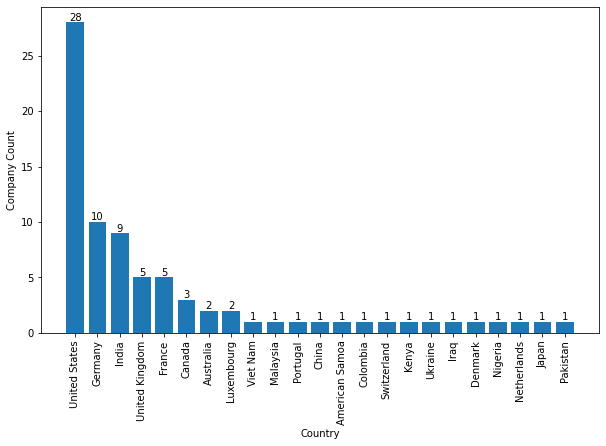

In [24]:
## Bar visual of number of companies per country
fig, ax = plt.subplots()
fig.set_size_inches([10, 6])

bar4 = ax.bar(comp_counts["company_location"], comp_counts["company_count"])
ax.set_xlabel("Country")
ax.set_ylabel("Company Count")
ax.set_xticklabels(comp_counts["company_location"], rotation=90)
ax.bar_label(bar4)

plt.show()

Looks like there are a lot of countries with less than 5 companies located in them so lets work with those with 5+ companies to get a decent average.

In [25]:
##Creating a new df with company locations and their respective mean salaries

mean_salaries_global = round(salaries_global_EN.groupby(salaries_global_EN["company_location"]).mean().sort_values("salary_in_usd", ascending=False),2)
mean_salaries = pd.DataFrame(mean_salaries_global)
mean_salaries = mean_salaries.reset_index()
mean_salaries.columns = ["company_location", "mean_salary_in_usd"]

## Joining comp_counts table with mean salaries to provide context to each mean salary
mean_salaries_df = mean_salaries.merge(comp_counts, on="company_location", how="left") 

## Lets adjust the table to only countries with 5 or more companies appear
adj_mean_salaries = mean_salaries_df[(mean_salaries_df["company_count"]>=5)] 
adj_mean_salaries

,company_location,mean_salary_in_usd,company_count
3,United States,98660.71,28
4,United Kingdom,65604.60,5
5,Germany,61710.40,10
7,France,47325.60,5
16,India,19629.33,9


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == "__main__":


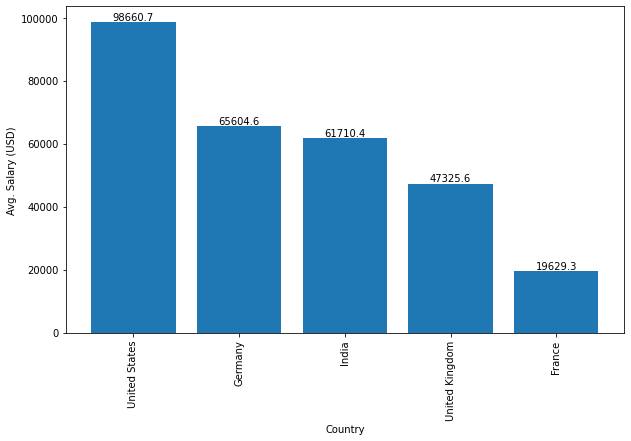

In [26]:
## Bar graph of the countries with 5+ companies and their average salaries for Entry Level positions

fig, ax = plt.subplots()
fig.set_size_inches([10, 6])

bar5=ax.bar(adj_mean_salaries["company_location"], adj_mean_salaries["mean_salary_in_usd"])
ax.set_xlabel("Country")
ax.set_ylabel("Avg. Salary (USD)")
ax.set_xticklabels(comp_counts["company_location"], rotation=90)
ax.bar_label(bar5)

plt.show()

Based on the above graph, the highest average salaries globaly (with 5+ companies) are the US, Germany, India, the UK, and France.

In [27]:
## Next, lets get the average salary of each country based on its remote ratio for Entry Level Positions

salary_rr = salaries_global_EN.groupby("company_location")["remote_ratio"].value_counts() + round(salaries_global_EN.groupby("remote_ratio")["salary_in_usd"].mean(), 2)

mean_salary_rr = pd.DataFrame(salary_rr)
mean_salary_rr = salary_rr.reset_index()
mean_salary_rr.columns = ['company_location', 'remote_ratio', 'avg_salary_in_usd']

mean_salary_rr.head()

,company_location,remote_ratio,avg_salary_in_usd
0,American Samoa,Remote,66886.45
1,Australia,Hybrid,63898.62
2,Australia,Remote,66886.45
3,Canada,On-Site,57668.36
4,Canada,Remote,66886.45


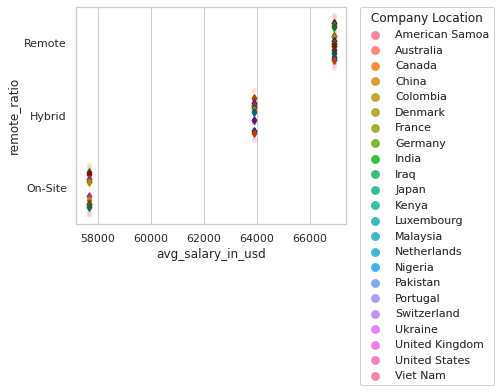

<Figure size 1152x864 with 0 Axes>

In [28]:
## Using seaborn to make a strip plot of each remote ratio for the different company locations

sns.set_theme(style="whitegrid")

g = sns.stripplot(x="avg_salary_in_usd", y="remote_ratio", hue="company_location",
              data=mean_salary_rr, dodge=True, alpha=.25, zorder=1) 

g = sns.pointplot(x="avg_salary_in_usd", y="remote_ratio", hue="company_location",
              data=mean_salary_rr, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

## Placing legend outside of graph to improve readability 
legend = len(mean_salary_rr['company_location'].unique()) 

handles, labels = g.get_legend_handles_labels()
comp_legend = handles[:legend], labels[:legend]

color_leg = g.legend(*comp_legend, title="Company Location", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

g.add_artist(color_leg)
plt.subplots_adjust(right=0.75)
plt.figure(figsize = (16,12))

plt.show()

Looks like the average salary in different countries remain fairly consistent based on the kind of remote ratio the position has. Remote positions entirely hold a higher average than Hybrid or On-Site positions, likewise, Hybrid also has a higher average than On-Site. It's probable, based on our previous analyses, since Remote positions have a higher average in the US as well as globaly, remote positions are paid more not because of the location but rather due to position qualifications such as a university degree or a high expertice in the field. Next we'll take a look at the prevalence of different positions and how that may relate to their pay.

# What type of position is more prevalent in the field?


In [29]:
# Quick SQL query to generate a table organizing positions by experience in order of low to high experience

position_count = pysql.sqldf("SELECT job_title, experience_level, COUNT(job_title) as job_count FROM salaries_jobs GROUP BY job_title, experience_level ORDER BY CASE WHEN experience_level = 'Entry' THEN 1 WHEN experience_level = 'Mid' THEN 2 WHEN experience_level = 'Senior' THEN 3 WHEN experience_level = 'Executive' THEN 4 END;")

position_count

,job_title,experience_level,job_count
0,AI Scientist,Entry,4
1,Applied Data Scientist,Entry,1
2,Applied Machine Learning Scientist,Entry,1
3,BI Data Analyst,Entry,2
4,Big Data Engineer,Entry,3
...,...,...,...
100,Head of Data Science,Executive,3
101,Head of Machine Learning,Executive,1
102,Lead Data Engineer,Executive,1
103,Principal Data Engineer,Executive,1


In [30]:
## To simplify the visualization we'll make a new table excluding positions with less that 5 jobs
## since they wont make the cut of the most prevalent positions in the industry anyway

top_positions = position_count[position_count["job_count"]>=5]

print(top_positions.head(), top_positions.tail(), sep="\n------------------------------------------------------------\n")


                    job_title experience_level  job_count
8                Data Analyst            Entry         12
10              Data Engineer            Entry         12
11    Data Science Consultant            Entry          5
12             Data Scientist            Entry         22
16  Machine Learning Engineer            Entry          9
------------------------------------------------------------
                    job_title experience_level  job_count
70             Data Scientist           Senior         61
82  Machine Learning Engineer           Senior         20
89   Principal Data Scientist           Senior          5
90         Research Scientist           Senior          5
98   Director of Data Science        Executive          6


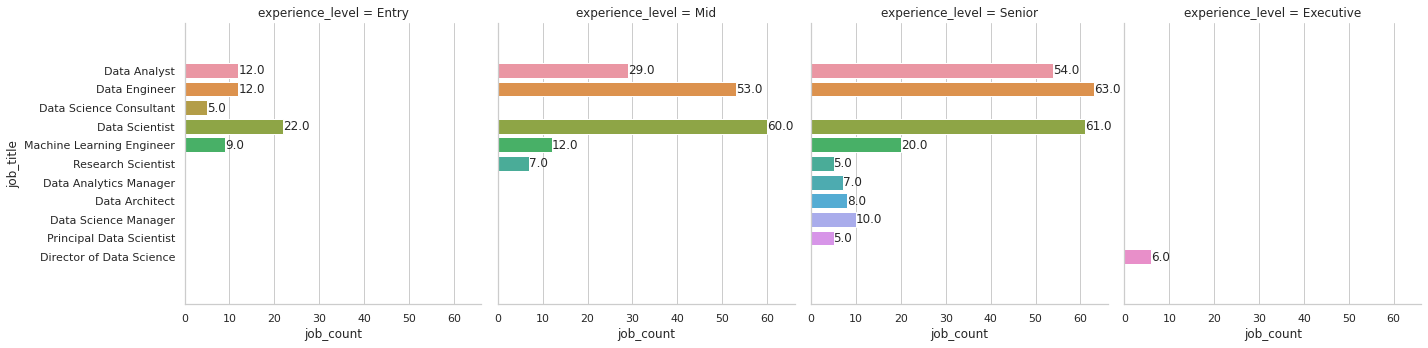

In [31]:
## Data Viz of position counts per experience level

g2 = sns.catplot(y="job_title", x="job_count", col="experience_level",
                 col_wrap=4, kind="bar", data=top_positions)

ax = g2.facet_axis(0, 0)

## Adding bar labels in facetgrid
for ax in g2.axes.ravel():
    for c in ax.containers:
        labels = [v.get_width() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

plt.show()

There's definitely some consistency on which are the most popular jobs across experience levels. Data Scientist seems to take the majority for Entry and Mid Level positions while Data Engineer looks to overtake Data Scientists in a Senior Level position. Regardless, the 3 most popular positions across the board look to be Data Scientists, Data Analysts and Data Engineers. 

An interesting detail from this analysis is that the Senior Level positions have a lot of positions exclusive to that bracket with Data Science Manager having the highest from these subset of positions. Understandably so, as Senior level positions will have managerial and department leading roles that won't be seen in Entry and Mid Level.

# How do these jobs increase in pay as experience level increases?

For this particular section, we are going to take a look at how the 3 most prevalent positions from the previous analysis increase in pay as the experience level of the position changes. 

In [32]:
## This time we'll be doing a pandas .query() to filter the data frame for the positions being analyzed

pay_per_exp = salaries_jobs.query("(job_title=='Data Analyst' and employment_type=='FT') or (job_title=='Data Engineer' and employment_type=='FT') or (job_title=='Data Scientist' and employment_type=='FT')")

## Confirming df query and reviewing position count total
print(pay_per_exp.head(), pay_per_exp.shape, pay_per_exp.groupby("job_title")["job_title"].value_counts(), sep='\n--------------------------------------\n')

         job_title experience_level employment_type  salary_in_usd  \
0   Data Scientist              Mid              FT          79833   
5     Data Analyst            Entry              FT          72000   
7   Data Scientist              Mid              FT          35735   
10  Data Scientist            Entry              FT          51321   
11  Data Scientist              Mid              FT          40481   

   employee_residence company_location remote_ratio  
0                  DE          Germany      On-Site  
5                  US    United States       Remote  
7                  HU          Hungary       Hybrid  
10                 FR           France      On-Site  
11                 IN            India      On-Site  
--------------------------------------
(365, 7)
--------------------------------------
job_title       job_title     
Data Analyst    Data Analyst       96
Data Engineer   Data Engineer     129
Data Scientist  Data Scientist    140
Name: job_title, dtype:

In [33]:
##

pay = round(pay_per_exp.sort_values("experience_level").groupby(["job_title", "experience_level"])["salary_in_usd"].mean(), 2)

exp_pay = pd.DataFrame(pay)
exp_pay = exp_pay.reset_index()

exp_pay

,job_title,experience_level,salary_in_usd
0,Data Analyst,Entry,57924.91
1,Data Analyst,Executive,120000.00
2,Data Analyst,Mid,71699.21
3,Data Analyst,Senior,111922.63
4,Data Engineer,Entry,58933.50
5,Data Engineer,Executive,245500.00
6,Data Engineer,Mid,88250.84
7,Data Engineer,Senior,137035.84
8,Data Scientist,Entry,54780.55
9,Data Scientist,Mid,81734.71


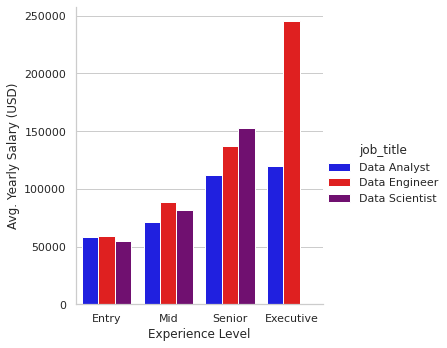

In [34]:
## Average Salary of the 3 most popular data science positions as experience level increases

sns.set_style("whitegrid")
sns.set_palette(["Blue", "Red", "Purple"])

order = ["Entry", "Mid", "Senior", "Executive"] ## Defining order of experience level in sort

## Redefining experience level to be able to plot it against its respective position salary
exp_pay["numeric_exp"] = pd.to_numeric(exp_pay.experience_level.replace(["Entry", "Mid", "Senior", "Executive"], [1, 2, 3, 4]))

g3 = sns.catplot(x="numeric_exp", y="salary_in_usd", hue="job_title", data=exp_pay, col_order=order, kind="bar")

g3.set(ylabel="Avg. Yearly Salary (USD)",xlabel="Experience Level")
g3.set_xticklabels(["Entry", "Mid", "Senior", "Executive"]) ## Relabeling ticks to express respective experience level in the plot

plt.show()

In [35]:
## Making a new column to demonstrate the percent increase of pay between experience levels for each position

exp_pay["percent_increase"] = round(exp_pay.sort_values("numeric_exp").groupby("job_title")["salary_in_usd"].pct_change(),2) * 100

exp_pay.sort_values(["job_title", "numeric_exp"])

## Reorganizing table 
exp_pay["percent_increase"] = exp_pay["percent_increase"].fillna(0)

exp_pay.sort_values(["job_title", "numeric_exp"])

,job_title,experience_level,salary_in_usd,numeric_exp,percent_increase
0,Data Analyst,Entry,57924.91,1,0.0
2,Data Analyst,Mid,71699.21,2,24.0
3,Data Analyst,Senior,111922.63,3,56.0
1,Data Analyst,Executive,120000.00,4,7.0
4,Data Engineer,Entry,58933.50,1,0.0
6,Data Engineer,Mid,88250.84,2,50.0
7,Data Engineer,Senior,137035.84,3,55.0
5,Data Engineer,Executive,245500.00,4,79.0
8,Data Scientist,Entry,54780.55,1,0.0
9,Data Scientist,Mid,81734.71,2,49.0


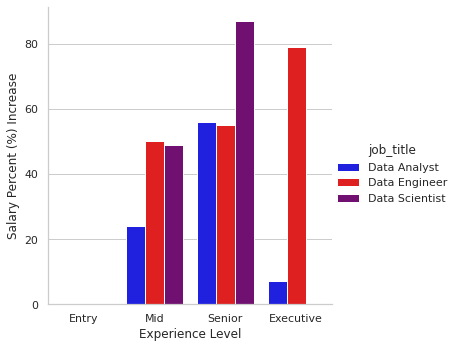

In [36]:
## Percent Increase in Salary as experience level increases 

sns.set_style("whitegrid")
sns.set_palette(["Blue", "Red", "Purple"])

order = ["Entry", "Mid", "Senior", "Executive"] ## Defining order of experience level in sort

g4 = sns.catplot(x="numeric_exp", y="percent_increase", hue="job_title", data=exp_pay, col_order=order, kind="bar")

g4.set(xlabel="Experience Level", ylabel="Salary Percent (%) Increase")
g4.set_xticklabels(["Entry", "Mid", "Senior", "Executive"]) ## Relabeling ticks to express respective experience level in the plot

plt.show()

The table and plot reveal that while all the jobs receive significant increases in salary from Entry to Mid and Mid to Senior, the definitive highest increase comes from Senior Data Scientists receiving an extraordinary 87% increase in salary. Not to say the others are bad by any means, from Entry to Mid Data Scientists and Data Engineers have about a 50% increase in salary and that honestly sounds fantastic. Meanwhile, Data Scientists do not receive a large bump from Entry to Mid but its Mid to Senior pay raise is a significant 56% increase. Cumulatively it seems like Data Engineers obtain the most increase in salaries but I'm curious to know if it is because Data Scientists turn over to more managereal positions in the executive leaving skewing the data to show a complete drop off of the position. 

# Conclusions

We've explored different facets of the Data Science domain, from the highest salaries of entry data jobs, the variance of pay between different remote offerings, the popularity of different jobs and how pay increases as experience increases. 

From the data, it gives me the impression Machine Learning positions are some of the most ludicrous positions for Entry Level (though how demanding its tech stack might be, is a separate question), and Data Analysts look to have a really reasonable average pay as an Entry level position.

Remote positions look to be paid more that hybrid or on-site, however, with more data and resources I would be interested to know if a remote position is more of a benefit for a position with more seniority or a more experienced analyst. 

Across different seniority positions, it seems Data Analyst, Engineer and Scientist ppositions are the more popular, like the previous question, with more data I'd be curious to know if these positions are just more popular because it is an umbrella term for their respective roles or if in fact they are more popular than all the preceeding positions.

Lastly, from the most popular positions I postulated with the available data and analysis, it looks like Data Engineers and Scientists enjoy a higher increase of pay across each experience level, while it seems Data Analysts experience their highest pay increase by reaching Senior Level, despite a much smaller bump when they reach Mid Level. All things considering, each f these positions have a reasonable and even might I say incredible salary track.

Well, that is all for this analysis, thank you for taking the time to go through this with me. As my first python project I took the liberty to experiment and showcase different methods of analysing the data, despite a lot of it that could have been analyzed with a similar repeated method. Switching up the method and packages used, allowed me to get a better understanding of my available tools and even lerned some new ones along the way, making me feel a more confident analyst as a result.